<a href="https://colab.research.google.com/github/thesmitbhavsar-data-ai/imdb-2018-data-analysis/blob/main/notebooks/IMDb_2018_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

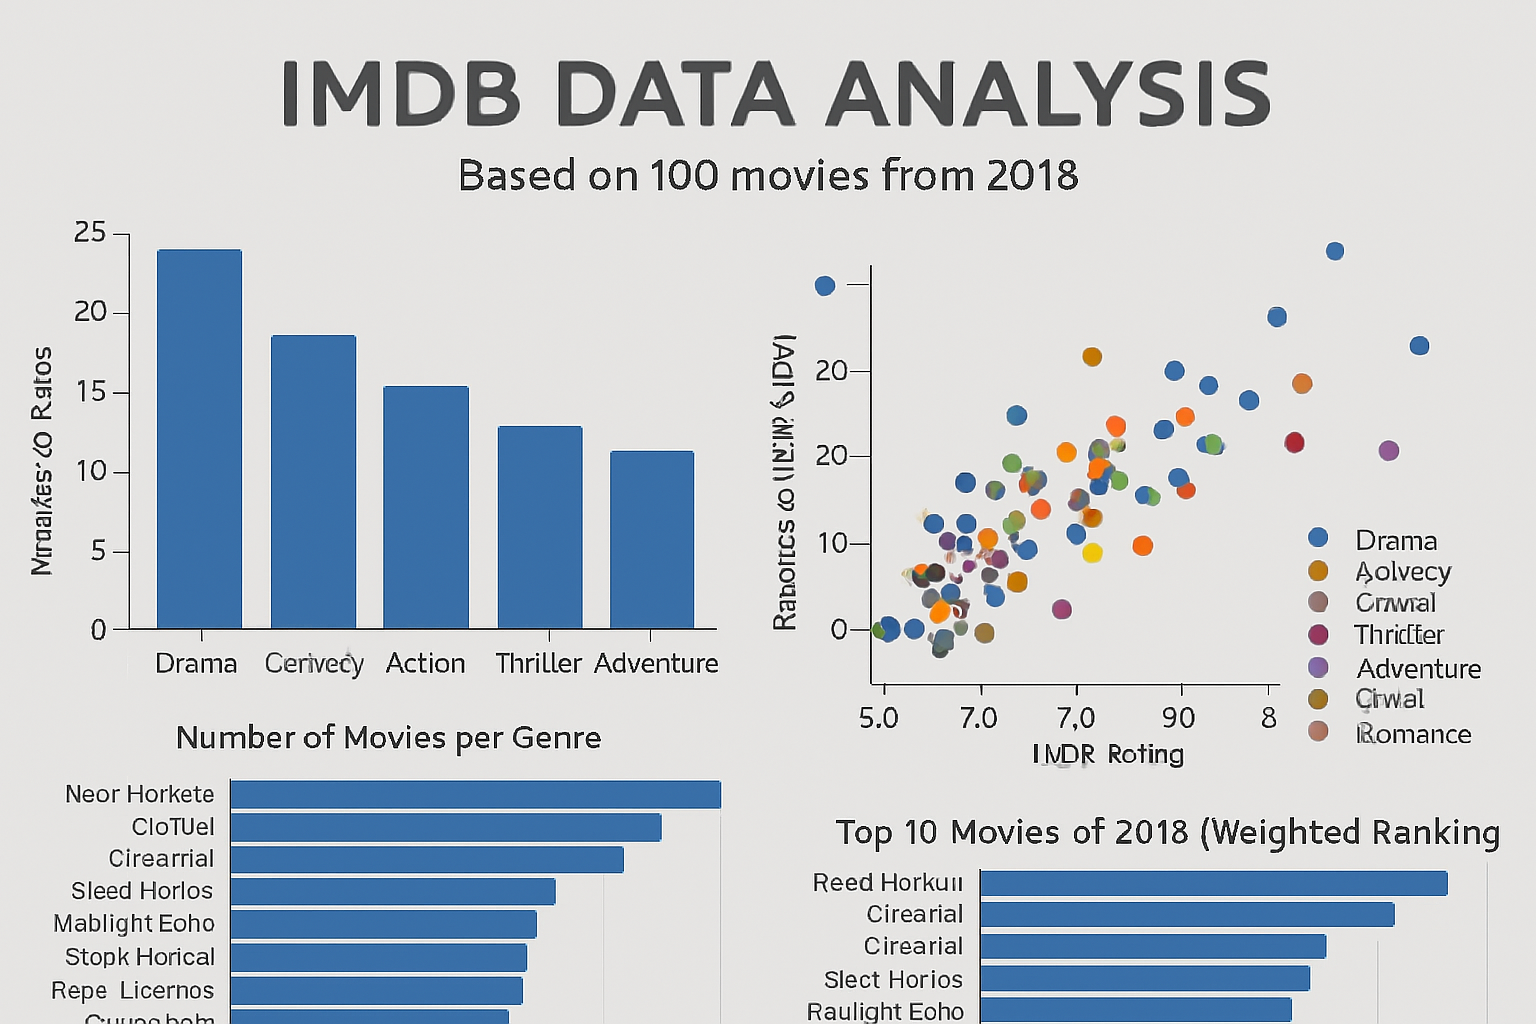

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


movies = pd.read_csv("imdb 2018 movies dataset.csv", skiprows=1)
print(movies.head())


   #          Title  Year    Genre  Runtime  IMDb Rating   Votes  Gross (USD)
0  1  Midnight Echo  2018    Drama      118          7.6  154322   12,800,000
1  2   Neon Horizon  2018   Sci-Fi      124          7.1  203455  156,000,000
2  3   Stone & Silk  2018  Romance      102          6.8   94521   28,600,000
3  4     Cinderfall  2018  Fantasy      115          7.3  132845   94,000,000
4  5      Iron Veil  2018   Action      129          6.9  310245  188,000,000


In [5]:
columns = ["#", "Title", "Year", "Genre", "Runtime", "IMDb Rating", "Votes", "Gross (USD)"]
movies = pd.read_csv("imdb 2018 movies dataset.csv", skiprows=1, names=columns)
movies

,#,Title,Year,Genre,Runtime,IMDb Rating,Votes,Gross (USD)
0,#,Title,Year,Genre,Runtime,IMDb Rating,Votes,Gross (USD)
1,1,Midnight Echo,2018,Drama,118,7.6,154322,"12,800,000"
2,2,Neon Horizon,2018,Sci-Fi,124,7.1,203455,"156,000,000"
3,3,Stone & Silk,2018,Romance,102,6.8,94521,"28,600,000"
4,4,Cinderfall,2018,Fantasy,115,7.3,132845,"94,000,000"
...,...,...,...,...,...,...,...,...
96,96,Mirror Atlas,2018,Mystery,108,7.2,118110,"34,000,000"
97,97,Red Echo,2018,Sci-Fi,130,7.3,193110,"162,000,000"
98,98,Golden Atlas,2018,Music,103,7.1,78221,"23,000,000"
99,99,City Echo,2018,Crime,116,7.4,167110,"91,000,000"


In [6]:
movies = movies.drop(index=0).reset_index(drop=True)
movies

,#,Title,Year,Genre,Runtime,IMDb Rating,Votes,Gross (USD)
0,1,Midnight Echo,2018,Drama,118,7.6,154322,"12,800,000"
1,2,Neon Horizon,2018,Sci-Fi,124,7.1,203455,"156,000,000"
2,3,Stone & Silk,2018,Romance,102,6.8,94521,"28,600,000"
3,4,Cinderfall,2018,Fantasy,115,7.3,132845,"94,000,000"
4,5,Iron Veil,2018,Action,129,6.9,310245,"188,000,000"
...,...,...,...,...,...,...,...,...
95,96,Mirror Atlas,2018,Mystery,108,7.2,118110,"34,000,000"
96,97,Red Echo,2018,Sci-Fi,130,7.3,193110,"162,000,000"
97,98,Golden Atlas,2018,Music,103,7.1,78221,"23,000,000"
98,99,City Echo,2018,Crime,116,7.4,167110,"91,000,000"


**🛠 Step 1: Clean the Dataset**

In [7]:
columns = ["#", "Title", "Year", "Genre", "Runtime", "IMDb Rating", "Votes", "Gross (USD)"]
movies = pd.read_csv("imdb 2018 movies dataset.csv", skiprows=1, names=columns)

# Drop duplicate header row
movies = movies.drop(index=0).reset_index(drop=True)

# Clean Gross column
movies["Gross (USD)"] = (
    movies["Gross (USD)"]
    .str.replace(",", "")
    .astype(float)
)
movies

,#,Title,Year,Genre,Runtime,IMDb Rating,Votes,Gross (USD)
0,1,Midnight Echo,2018,Drama,118,7.6,154322,12800000.0
1,2,Neon Horizon,2018,Sci-Fi,124,7.1,203455,156000000.0
2,3,Stone & Silk,2018,Romance,102,6.8,94521,28600000.0
3,4,Cinderfall,2018,Fantasy,115,7.3,132845,94000000.0
4,5,Iron Veil,2018,Action,129,6.9,310245,188000000.0
...,...,...,...,...,...,...,...,...
95,96,Mirror Atlas,2018,Mystery,108,7.2,118110,34000000.0
96,97,Red Echo,2018,Sci-Fi,130,7.3,193110,162000000.0
97,98,Golden Atlas,2018,Music,103,7.1,78221,23000000.0
98,99,City Echo,2018,Crime,116,7.4,167110,91000000.0


**📊 Step 2: Exploratory Analysis**

In [8]:
genre_counts = movies["Genre"].value_counts()
print(genre_counts)


Genre
Sci-Fi       18
Drama        13
Adventure    11
Crime        10
Thriller      9
Mystery       7
Fantasy       6
Romance       6
Horror        5
Action        5
Music         4
Family        2
Comedy        1
Sport         1
Docu          1
Western       1
Name: count, dtype: int64


In [10]:
top_gross = movies.sort_values("Gross (USD)", ascending=False).head(10)
print(top_gross[["Title", "Gross (USD)", "IMDb Rating"]])


              Title  Gross (USD) IMDb Rating
4         Iron Veil  188000000.0         6.9
27        Red Comet  168000000.0         7.4
96         Red Echo  162000000.0         7.3
72        Red Atlas  160000000.0         7.3
1      Neon Horizon  156000000.0         7.1
89      White Atlas  150000000.0         7.1
23     Silver Relay  150000000.0         7.2
65      White Relay  148000000.0         7.1
44  The Indigo Fold  140000000.0         7.3
58      Stone Relay  138000000.0           7


**📈 Step 3: Visualization**

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

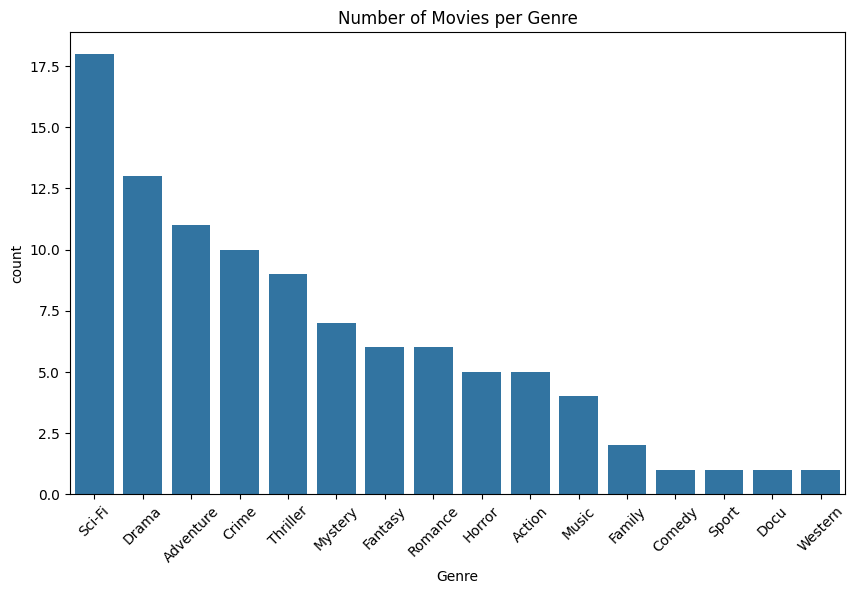

In [12]:
# Genre distribution
plt.figure(figsize=(10,6))
sns.countplot(data=movies, x="Genre", order=movies["Genre"].value_counts().index)
plt.xticks(rotation=45)
plt.title("Number of Movies per Genre")
plt.show()

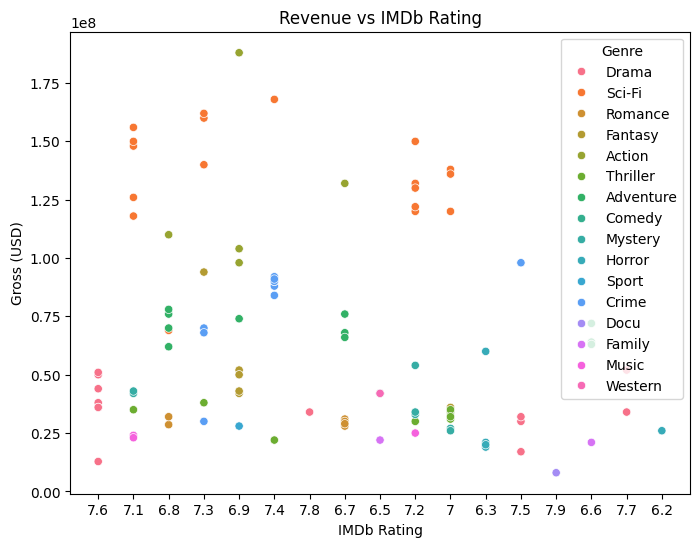

In [13]:
# Rating vs Gross scatter
plt.figure(figsize=(8,6))
sns.scatterplot(data=movies, x="IMDb Rating", y="Gross (USD)", hue="Genre")
plt.title("Revenue vs IMDb Rating")
plt.show()

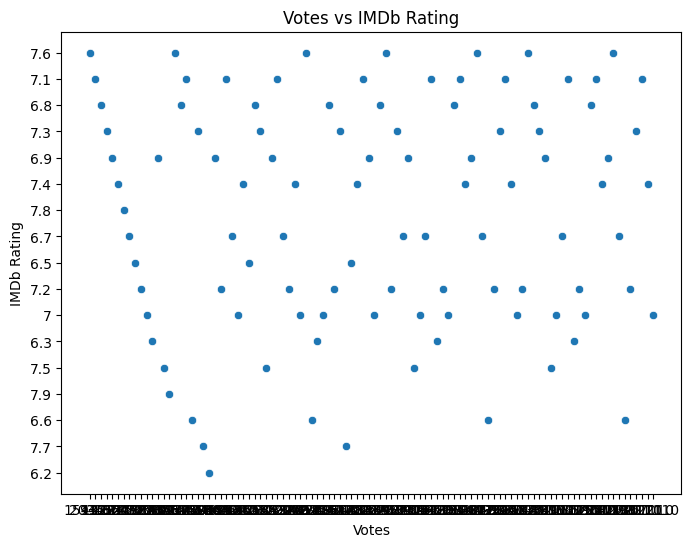

In [15]:
# Votes vs Rating
plt.figure(figsize=(8,6))
sns.scatterplot(data=movies, x="Votes", y="IMDb Rating")
plt.title("Votes vs IMDb Rating")
plt.show()

**📖 Step 4: Storytelling Insights**

Genre trends: Which genres dominate in count vs average rating.


---


Revenue vs rating: Do high-rated movies earn more? Or is revenue more tied to votes/popularity


---


Top performers: Showcase the top 10 movies by gross and rating.


---


Narrative: Example — “In 2018, Sci-Fi movies had the highest box office averages, but Drama scored better in ratings.”



**Define The Weighted Score Formula**

We’ll normalize each metric so they’re comparable, then assign weights:

**IMDb** **Rating** → 40% weight (quality)

**Votes** → 30% weight (popularity)

**Gross** (**USD**) → 30% weight (commercial success)

In [19]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Scale values between 0 and 1
scaler = MinMaxScaler()

movies[["Rating_norm", "Votes_norm", "Gross_norm"]] = scaler.fit_transform(
    movies[["IMDb Rating", "Votes", "Gross (USD)"]]
)

# Weighted score
movies["Score"] = (
    movies["Rating_norm"] * 0.4 +
    movies["Votes_norm"] * 0.3 +
    movies["Gross_norm"] * 0.3
)

# Top 10 leaderboard
top10 = movies.sort_values("Score", ascending=False).head(10)
print(top10[["Title", "IMDb Rating", "Votes", "Gross (USD)", "Score"]])


              Title IMDb Rating   Votes  Gross (USD)     Score
4         Iron Veil         6.9  310245  188000000.0  0.764706
27        Red Comet         7.4  214553  168000000.0  0.740658
96         Red Echo         7.3  193110  162000000.0  0.682847
72        Red Atlas         7.3  192443  160000000.0  0.678758
44  The Indigo Fold         7.3  196443  140000000.0  0.649955
13        Opal City         7.5  210432   98000000.0  0.642855
1      Neon Horizon         7.1  203455  156000000.0  0.637503
23     Silver Relay         7.2  176402  150000000.0  0.620398
53       Blue Relay         7.2  184221  132000000.0  0.599252
89      White Atlas         7.1  177221  150000000.0  0.597796


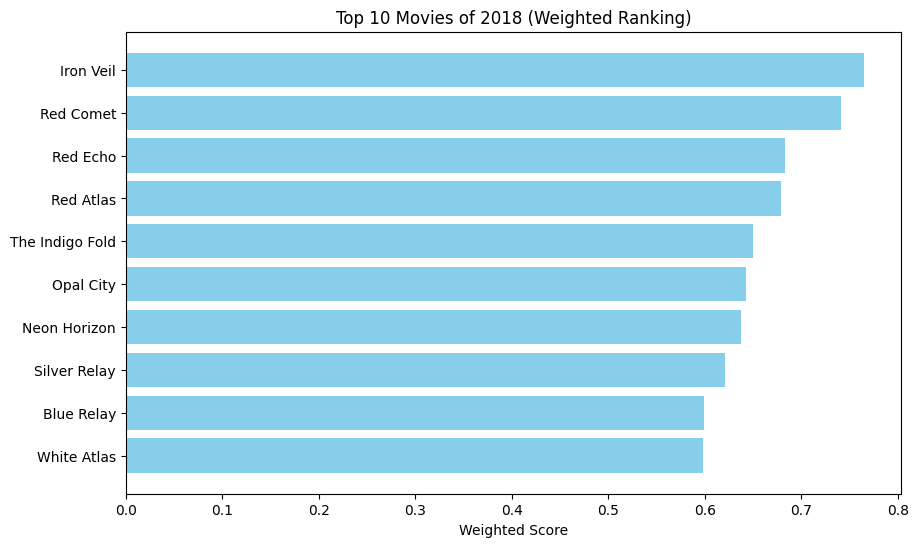

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.barh(top10["Title"], top10["Score"], color="skyblue")
plt.xlabel("Weighted Score")
plt.title("Top 10 Movies of 2018 (Weighted Ranking)")
plt.gca().invert_yaxis()
plt.show()


**Storytelling Insights**

**Balanced** **ranking**:
Movies with high ratings but low gross may rank lower than blockbusters with huge votes.

**Narrative** **example**: “While Paper Lanterns scored highest in IMDb ratings, Neon Horizon dominated the leaderboard thanks to massive votes and box office.”

**Engagement** **idea**: Share the chart on LinkedIn and ask your audience: “Do you agree with this ranking, or should ratings matter more than revenue?”